### Importing Libraries

In [2]:
import pandas as pd
from io import StringIO
import os
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor

#### read the data

In [3]:
data = pd.read_csv('UCI_Credit_Card.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


### Dataset information

In [4]:
# # Dataset Information
# This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# ##### Content
# ###### There are 25 variables:

# ID: ID of each client
# LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
# SEX: Gender (1=male, 2=female)
# EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
# MARRIAGE: Marital status (1=married, 2=single, 3=others)
# AGE: Age in years
# PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
# PAY_2: Repayment status in August, 2005 (scale same as above)
# PAY_3: Repayment status in July, 2005 (scale same as above)
# PAY_4: Repayment status in June, 2005 (scale same as above)
# PAY_5: Repayment status in May, 2005 (scale same as above)
# PAY_6: Repayment status in April, 2005 (scale same as above)
# BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
# BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
# BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
# BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
# BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
# BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
# PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
# PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
# PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
# PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
# default.payment.next.month: Default payment (1=yes, 0=no)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

# Preprocessing
### Dealing with missing data

In [6]:
data.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### deleting nan values


In [7]:
data_clean = data.dropna()
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


##### correlation between different columns

In [8]:

data.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


#### joining all pay_amt column in one, aslo all bill_amt is one column

In [9]:
# joining all pay_amt column in one, aslo all bill_amt is one column
data['PAY_AMT'] = data['PAY_AMT1'] + data['PAY_AMT2']+ data['PAY_AMT4']+data['PAY_AMT5']+ data['PAY_AMT6']
data['BILL_AMT'] = data['BILL_AMT1'] +  data['BILL_AMT2']+  data['BILL_AMT3']+data['BILL_AMT4']+  data['BILL_AMT5']+  data['BILL_AMT6']

In [10]:
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,PAY_AMT,BILL_AMT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,689.0,7704.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,4000.0,17077.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,10018.0,101653.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,7188.0,231334.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,49049.0,109339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0,37547.0,725349.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0,5492.0,21182.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1,9300.0,70496.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1,146003.0,266611.0


### Train Test split

#### declare our target and features

In [11]:
features = ["SEX","EDUCATION","AGE","PAY_AMT","BILL_AMT"]
target = ['LIMIT_BAL']

In [12]:
X = data[features]
y = data[target]

#### split data into train and test sets


In [13]:

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

### XGBoost

#### Model #1

In [14]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [15]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [16]:
# Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))
print(rmse)

131727.84114814413


In [17]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = preds))

In [18]:
print(RMSE)

131727.84114814413


In [ ]:
# Is it any good?
print('Mean target value: ' + str(np.mean(data[target])))
import seaborn as sns
sns.boxplot(data[target])
plt.rcParams['figure.figsize'] = [12, 2]

#### Model #2

In [68]:
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 30)

In [69]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

In [70]:
# Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.
rmse = np.sqrt(mean_squared_error(y_test, preds))
#print("RMSE: %f" % (rmse))
print(rmse)

101797.85427931968


Mean target value: LIMIT_BAL    167484.322667
dtype: float64


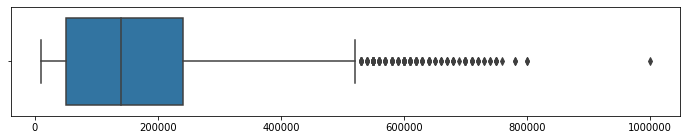

In [71]:
# Is it any good?
print('Mean target value: ' + str(np.mean(data[target])))
import seaborn as sns
sns.boxplot(data[target])
plt.rcParams['figure.figsize'] = [12, 2]

## k-fold Cross Validation using XGBoost

train-rmse-mean    119431.935625
train-rmse-std        712.911502
test-rmse-mean     120104.103802
test-rmse-std         987.636217
dtype: float64

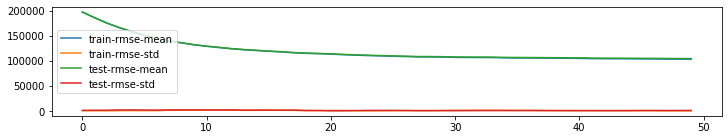

In [23]:
data_dmatrix = xgb.DMatrix(data=X,label=y)
params = {'objective':'reg:squarederror','colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)
# num_boost_round - Number of times to run cross-validation

# cv_results contains train and test RMSE metrics for each boosting round.

display(cv_results.mean())
cv_results.plot()
plt.rcParams['figure.figsize'] = [20, 5]

In [24]:
cv_results.shape

(50, 4)

In [25]:
print((cv_results["test-rmse-mean"]).tail(1))

49    104227.515625
Name: test-rmse-mean, dtype: float64


#### Linear Regression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

#### (1) Linear Regression: Fit a model to the training se

In [27]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Perform Prediction using Linear Regression Model

In [28]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[171292.82937961],
       [245130.77776117],
       [131912.31447537],
       ...,
       [183406.71803522],
       [393417.01769026],
       [205812.07085455]])

#### What is the mean of the expected target value in test set ?

In [29]:
y_test.describe()

,LIMIT_BAL
count,9900.000000
mean,166326.262626
std,130377.418121
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


#### Evaluate Linear Regression Accuracy using Root Mean Square Error

In [30]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [31]:
print(RMSE)

114277.41925026765


#### (2) Decision Tree Regressor: Fit a new regression model to the training set

In [32]:
regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#### Perform Prediction using Decision Tree Regressor

In [33]:
y_prediction = regressor.predict(X_test)
y_prediction

array([ 50000.        ,  50000.        ,  72142.85714286, ...,
       133870.96774194, 610000.        , 253809.52380952])

#### For comparision: What is the mean of the expected target value in test set ?

In [34]:
y_test.describe()

,LIMIT_BAL
count,9900.000000
mean,166326.262626
std,130377.418121
min,10000.000000
25%,50000.000000
50%,140000.000000
75%,240000.000000
max,1000000.000000


#### Evaluate Decision Tree Regression Accuracy using Root Mean Square Error

In [35]:
RMSE = sqrt(mean_squared_error(y_true = y_test, y_pred = y_prediction))

In [36]:
print(RMSE)

132841.0593823259
